# Analiza bazy danych ,,Human Development"

## 1. Importowanie paczek python'owych, wczytanie pliku danych oraz wyczyszczenie danych

In [1]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
dane_kontynenty = pd.read_csv('continents.csv', sep=';')
dane_panstwa = pd.read_csv('gender_development.csv', sep=',',na_values = '..')

In [3]:
dane = pd.concat([dane_panstwa, dane_kontynenty,], axis = 1)
dane = dane.drop([188,189,190,191,192,193,194],axis=0)

In [7]:
dane.to_csv('human_development.csv')

In [4]:
dane["Gender development"] = dane["Gender development"].str.lower()

In [5]:
dane = dane.drop(["GDI Rank"], axis = 1)

In [6]:
dane = dane.dropna()

In [4]:
dane = pd.read_csv('human_development.csv')

In [19]:
dane.rename(columns = {'Estimated Gross National Income per Capita (Female)':'Estimated Gross National Income per Capita (Female)[$]','Estimated Gross National Income per Capita (Male)[$]':'Estimated Gross National Income per Capita (Male)[$]'})

,Country,Gender Development Index (GDI),Human Development Index (Female),Human Development Index (Male),Life Expectancy at Birth (Female),Life Expectancy at Birth (Male),Expected Years of Education (Female),Expected Years of Education (Male),Mean Years of Education (Female),Mean Years of Education (Male),Estimated Gross National Income per Capita (Female)[$],Estimated Gross National Income per Capita (Male),Continent,Gender development
0,Norway,0.996,0.940,0.944,83.6,79.5,18.2,16.8,12.7,12.5,57140.0,72825.0,Europe,high
1,Australia,0.976,0.922,0.945,84.5,80.3,20.7,19.7,13.1,12.9,33688.0,50914.0,Australia and Oceania,high
2,Switzerland,0.950,0.898,0.945,85.0,80.8,15.7,15.9,11.5,13.1,44132.0,69077.0,Europe,average
3,Denmark,0.977,0.912,0.934,82.2,78.3,19.3,18.1,12.8,12.7,36439.0,51727.0,Europe,high
4,Netherlands,0.947,0.893,0.943,83.3,79.7,18.0,17.9,11.6,12.2,29500.0,61641.0,Europe,average
5,Germany,0.963,0.901,0.936,83.3,78.5,16.3,16.6,12.9,13.8,34886.0,53290.0,Europe,average
6,Ireland,0.973,0.901,0.926,83.0,78.8,18.5,18.7,12.3,12.0,30104.0,49166.0,Europe,high
7,United States,0.995,0.911,0.916,81.4,76.7,17.2,15.7,13.0,12.9,43054.0,63158.0,North America,high
8,Canada,0.982,0.904,0.921,84.0,80.0,16.3,15.5,13.1,13.0,33587.0,50853.0,North America,high
9,New Zealand,0.961,0.894,0.930,83.6,80.0,20.0,18.3,12.5,12.6,24309.0,41372.0,Australia and Oceania,average


## 2. Dane

In [8]:
dane

,Country,Gender Development Index (GDI),Human Development Index (Female),Human Development Index (Male),Life Expectancy at Birth (Female),Life Expectancy at Birth (Male),Expected Years of Education (Female),Expected Years of Education (Male),Mean Years of Education (Female),Mean Years of Education (Male),Estimated Gross National Income per Capita (Female),Estimated Gross National Income per Capita (Male),Continent,Gender development
0,Norway,0.996,0.940,0.944,83.6,79.5,18.2,16.8,12.7,12.5,57140.0,72825.0,Europe,high
1,Australia,0.976,0.922,0.945,84.5,80.3,20.7,19.7,13.1,12.9,33688.0,50914.0,Australia and Oceania,high
2,Switzerland,0.950,0.898,0.945,85.0,80.8,15.7,15.9,11.5,13.1,44132.0,69077.0,Europe,average
3,Denmark,0.977,0.912,0.934,82.2,78.3,19.3,18.1,12.8,12.7,36439.0,51727.0,Europe,high
4,Netherlands,0.947,0.893,0.943,83.3,79.7,18.0,17.9,11.6,12.2,29500.0,61641.0,Europe,average
5,Germany,0.963,0.901,0.936,83.3,78.5,16.3,16.6,12.9,13.8,34886.0,53290.0,Europe,average
6,Ireland,0.973,0.901,0.926,83.0,78.8,18.5,18.7,12.3,12.0,30104.0,49166.0,Europe,high
7,United States,0.995,0.911,0.916,81.4,76.7,17.2,15.7,13.0,12.9,43054.0,63158.0,North America,high
8,Canada,0.982,0.904,0.921,84.0,80.0,16.3,15.5,13.1,13.0,33587.0,50853.0,North America,high
9,New Zealand,0.961,0.894,0.930,83.6,80.0,20.0,18.3,12.5,12.6,24309.0,41372.0,Australia and Oceania,average


## 3. Opis zmiennej ,,Human Development Index (Female)"

In [9]:
zmienna = 'Human Development Index (Female)'
dane[zmienna].describe()

count    161.000000
mean       0.675050
std        0.168321
min        0.287000
25%        0.541000
50%        0.711000
75%        0.812000
max        0.940000
Name: Human Development Index (Female), dtype: float64

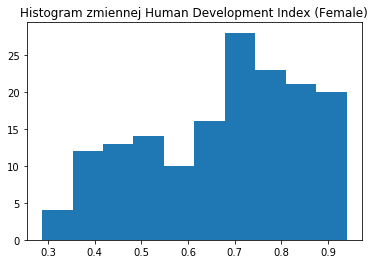

In [10]:
plt.hist(dane[zmienna])
plt.title('Histogram zmiennej Human Development Index (Female)')
plt.show()

## 4. Opis zmiennej ,,Human Development Index (Male)"

In [11]:
zmienna = 'Human Development Index (Male)'
dane[zmienna].describe()

count    161.000000
mean       0.718075
std        0.145709
min        0.392000
25%        0.609000
50%        0.737000
75%        0.835000
max        0.945000
Name: Human Development Index (Male), dtype: float64

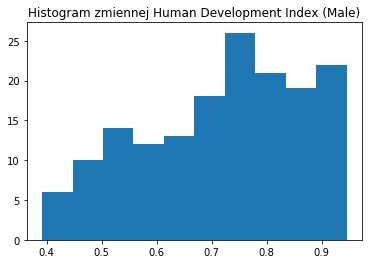

In [12]:
plt.hist(dane[zmienna])
plt.title('Histogram zmiennej Human Development Index (Male)')
plt.show()

## 5. Opis zmiennej ,,Life Expectancy at Birth (Female)''

In [13]:
zmienna = 'Life Expectancy at Birth (Female)'
dane[zmienna].describe()

count    161.000000
mean      73.919876
std        8.958584
min       48.200000
25%       68.300000
50%       76.700000
75%       80.600000
max       86.800000
Name: Life Expectancy at Birth (Female), dtype: float64

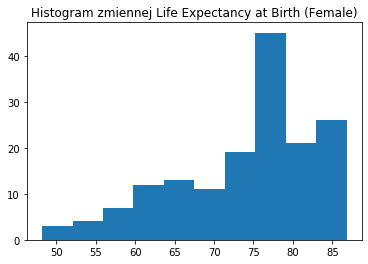

In [14]:
plt.hist(dane[zmienna])
plt.title('Histogram zmiennej Life Expectancy at Birth (Female)')
plt.show()

## 6. Opis zmiennej ,,Life Expectancy at Birth (Male)''

In [15]:
zmienna = 'Life Expectancy at Birth (Male)'
dane[zmienna].describe()

count    161.000000
mean      69.149689
std        8.004148
min       48.800000
25%       64.400000
50%       70.700000
75%       75.400000
max       81.200000
Name: Life Expectancy at Birth (Male), dtype: float64

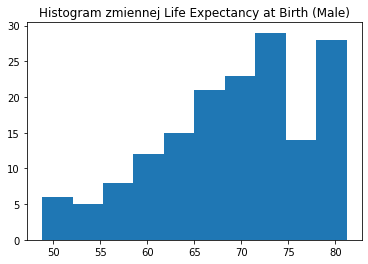

In [16]:
plt.hist(dane[zmienna])
plt.title('Histogram zmiennej Life Expectancy at Birth (Male)')
plt.show()

## 7. Opis zmiennej ,,Expected Years of Education (Female)''

In [17]:
zmienna = 'Expected Years of Education (Female)'
dane[zmienna].describe()

count    161.000000
mean      13.205590
std        3.240433
min        4.800000
25%       10.900000
50%       13.600000
75%       15.500000
max       20.700000
Name: Expected Years of Education (Female), dtype: float64

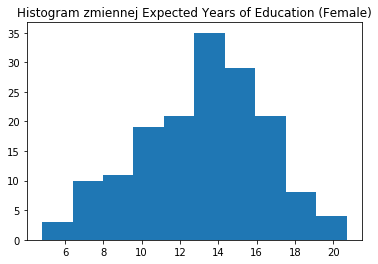

In [18]:
plt.hist(dane[zmienna])
plt.title('Histogram zmiennej Expected Years of Education (Female)')
plt.show()

## 8. Opis zmiennej ,,Expected Years of Education (Male)''

In [19]:
zmienna = 'Expected Years of Education (Male)'
dane[zmienna].describe()

count    161.000000
mean      13.075155
std        2.469793
min        6.100000
25%       11.300000
50%       13.200000
75%       14.800000
max       19.700000
Name: Expected Years of Education (Male), dtype: float64

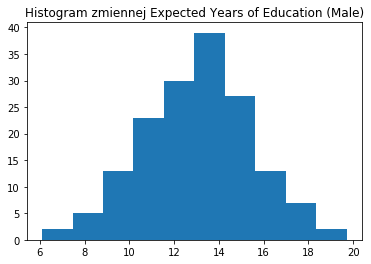

In [20]:
plt.hist(dane[zmienna])
plt.title('Histogram zmiennej Expected Years of Education (Male)')
plt.show()

## 9. Opis zmiennej ,,Mean Years of Education (Female)''

In [21]:
zmienna = 'Mean Years of Education (Female)'
dane[zmienna].describe()

count    161.000000
mean       7.824845
std        3.448750
min        0.800000
25%        5.300000
50%        8.400000
75%       10.600000
max       13.100000
Name: Mean Years of Education (Female), dtype: float64

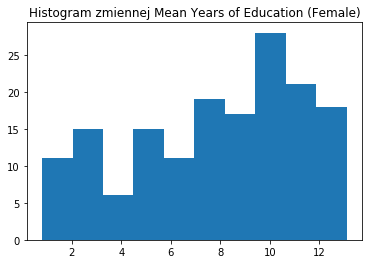

In [22]:
plt.hist(dane[zmienna])
plt.title('Histogram zmiennej Mean Years of Education (Female)')
plt.show()

## 10. Opis zmiennej ,,Mean Years of Education (Male)'' 

In [23]:
zmienna = 'Mean Years of Education (Male)'
dane[zmienna].describe()

count    161.00000
mean       8.64472
std        2.86140
min        1.90000
25%        6.30000
50%        8.80000
75%       11.10000
max       13.80000
Name: Mean Years of Education (Male), dtype: float64

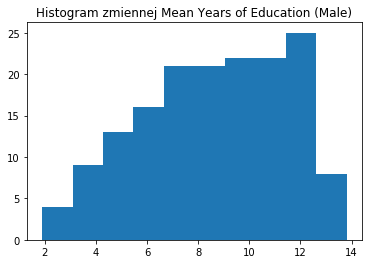

In [24]:
plt.hist(dane[zmienna])
plt.title('Histogram zmiennej Mean Years of Education (Male)')
plt.show()

## 11. Opis zmiennej ,,Estimated Gross National Income per Capita (Female)'' 

In [25]:
zmienna = 'Estimated Gross National Income per Capita (Female)'
dane[zmienna].describe()

count      161.000000
mean     12299.776398
std      13038.303107
min        476.000000
25%       2365.000000
50%       7427.000000
75%      18423.000000
max      59994.000000
Name: Estimated Gross National Income per Capita (Female), dtype: float64

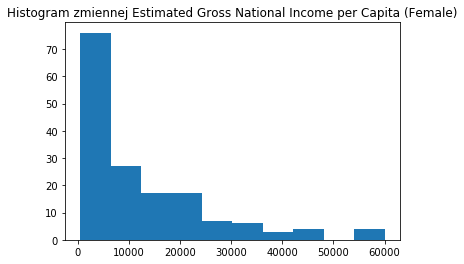

In [26]:
plt.hist(dane[zmienna])
plt.title('Histogram zmiennej Estimated Gross National Income per Capita (Female)')
plt.show()

##  12. Opis zmiennej ,,Estimated Gross National Income per Capita (Male)'' 

In [27]:
zmienna = 'Estimated Gross National Income per Capita (Male)'
dane[zmienna].describe()

count       161.000000
mean      22445.360248
std       23646.740275
min         689.000000
25%        5468.000000
50%       14754.000000
75%       30320.000000
max      143979.000000
Name: Estimated Gross National Income per Capita (Male), dtype: float64

In [ ]:
plt.bar()

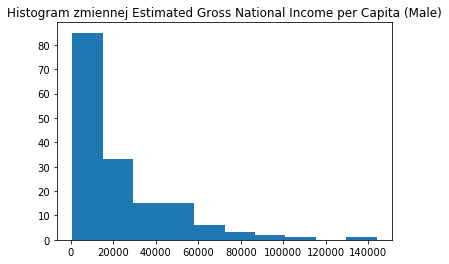

In [28]:
plt.hist(dane[zmienna])
plt.title('Histogram zmiennej Estimated Gross National Income per Capita (Male)')
plt.show()

## 13. Średnie wartości każdej zmiennej w zależności od kontynentu 

In [5]:
dane.groupby('Continent')[['Gender Development Index (GDI)','Human Development Index (Female)','Human Development Index (Male)','Life Expectancy at Birth (Female)','Life Expectancy at Birth (Male)','Expected Years of Education (Female)','Expected Years of Education (Male)','Mean Years of Education (Female)','Mean Years of Education (Male)','Estimated Gross National Income per Capita (Female)','Estimated Gross National Income per Capita (Male)']].mean()

,Gender Development Index (GDI),Human Development Index (Female),Human Development Index (Male),Life Expectancy at Birth (Female),Life Expectancy at Birth (Male),Expected Years of Education (Female),Expected Years of Education (Male),Mean Years of Education (Female),Mean Years of Education (Male),Estimated Gross National Income per Capita (Female),Estimated Gross National Income per Capita (Male)
Continent,,,,,,,,,,,
Africa,0.871386,0.480977,0.548568,62.659091,59.700000,9.997727,10.875000,4.175000,5.693182,2865.886364,5777.159091
Asia,0.913605,0.681488,0.740651,75.606977,70.909302,12.934884,13.030233,7.567442,8.606977,13241.883721,30001.930233
Australia and Oceania,0.950667,0.747833,0.784667,77.983333,72.950000,15.850000,15.216667,10.733333,11.100000,11937.333333,19963.833333
Europe,0.981718,0.838641,0.854923,81.356410,75.271795,16.138462,15.333333,11.082051,11.512821,23197.871795,36523.512821
North America,0.975250,0.730000,0.747750,78.281250,72.687500,13.637500,12.768750,9.125000,9.062500,11791.312500,19282.250000
South America,0.971077,0.718615,0.739308,76.900000,70.838462,14.407692,13.284615,8.315385,8.507692,9212.461538,16669.923077


# PYTANIA

## 1. CZY GDI ZALEŻY OD KONTYNETU?

### Wykres średniego wartości Gender Development Index w zależności od kontynetu

## TEST: Korelacja zmiennych ,,Continent" oraz ,,Gender development" - Test χ2

### Tabela krzyżowa

In [6]:
confusion_matrix = pd.crosstab(dane['Continent'], dane['Gender development'])
confusion_matrix

Gender development,average,high,low
Continent,,,
Africa,24,2,18
Asia,27,10,6
Australia and Oceania,5,1,0
Europe,12,27,0
North America,7,9,0
South America,5,8,0


### Wartość statystyki testowej

In [7]:
st.chi2_contingency(confusion_matrix)[0]

68.62674770415649

### Ilość stopni swobody

In [8]:
st.chi2_contingency(confusion_matrix)[2]

10

### Istotność

In [9]:
st.chi2_contingency(confusion_matrix)[1]

8.158348632609732e-11

## ODPOWIEDŹ: Istotność jest mniejsza od 0.001, wiec możemy swobodnie odrzucić hipotezę zerową, która mówi o niezależności dwóch zmiennych i stwierdzić, że zmienna ,,Gender Development" jest zależna od zmiennej ,,Continent".

### Tabela i wykres ilustrujące:

In [10]:
round(dane.groupby('Continent')[['Gender Development Index (GDI)']].mean(),3)

,Gender Development Index (GDI)
Continent,
Africa,0.871
Asia,0.914
Australia and Oceania,0.951
Europe,0.982
North America,0.975
South America,0.971


<function matplotlib.pyplot.show(*args, **kw)>

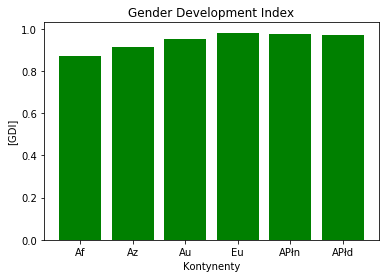

In [18]:
kontynenty = ['Af','Az','Au','Eu','APłn','APłd']
GDI = [0.871,0.914,0.951,0.982,0.975,0.971]


index = np.arange(6)
width = 0.3

plt.bar(index,GDI,color='green')

plt.title("Gender Development Index")

plt.ylabel("[GDI]")
plt.xlabel('Kontynenty')
plt.xticks(index, kontynenty)
plt.show

## 2. CZY JEST ISTOTNA RÓŻNICA W OCZEKIWANEJ LICZBIE LAT NAUKI MIĘDZY KOBIETAMI A MĘŹCZYZNAMI? 

### Test istotności różnicy w oczekiwanej liczbie lata nauki między płciami 

In [14]:
stat, p = ttest_ind(dane['Expected Years of Education (Female)'], dane['Expected Years of Education (Male)'])
print('Statystyka=',stat,'p=',p)
alfa = 0.05
if p > alfa:
    print('Nie można odrzucić Hipotezy zerowej')
else:
    print('Odrzucamy hipotezę zerową- istnieje różnica ')

Statystyka =0.406, p=0.685
Nie można odrzucić Hipotezy zerowej


## ODPOWIEDŹ: NIE MA ISTOTNEJ STATYSTYCZNIE RÓŹNICY MIĘDZY OCZEKIWANĄ ILOŚCIĄ LAT NAUKI WŚRÓD MĘŻCZYZN I KOBIET

### Tabela i wykres ilustrujący 

In [15]:
round(dane.groupby('Continent')[['Expected Years of Education (Female)','Expected Years of Education (Male)']].mean(),3)

,Expected Years of Education (Female),Expected Years of Education (Male)
Continent,,
Africa,9.998,10.875
Asia,12.935,13.030
Australia and Oceania,15.850,15.217
Europe,16.138,15.333
North America,13.638,12.769
South America,14.408,13.285


<function matplotlib.pyplot.show(*args, **kw)>

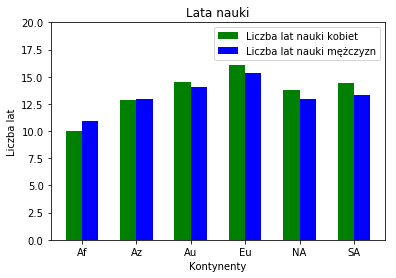

In [10]:
kontynenty = ['Af','Az','Au','Eu','NA','SA']
EYEF = [10.035417,12.881818,14.500000,16.080000,13.795000,14.407692]
EYEM = [10.956250,12.984091,14.044444,15.352500,12.920000,13.284615]

index = np.arange(6)
width = 0.3

plt.bar(index,EYEF,width,color='green',label='Liczba lat nauki kobiet')
plt.bar(index+width,EYEM,width,color='blue',label='Liczba lat nauki mężczyzn')
plt.title("Lata nauki")

plt.ylabel("Liczba lat")
plt.xlabel('Kontynenty')
plt.xticks(index+width/2, kontynenty)
plt.ylim(0,20)

plt.legend(loc='best')
plt.show

## 3. CZY JEST ISTOTNA STATYSTYCZNIE RÓŻNICA MIEDZY SZACOWANYM DOCHODEM NARODOWYM BRUTTO WŚRÓD KOBIET I MĘŻCZYZN?

### Test istotności różnicy między szacowanym dochodem narodowym brutto na kobietę i mężczyznę

In [34]:
stat, p = ttest_ind(dane['Estimated Gross National Income per Capita (Male)'], dane['Estimated Gross National Income per Capita (Female)'])
print('Statystyka=',stat,'p=',p)
alfa = 0.05
if p > alfa:
    print('Nie można odrzucić Hipotezy zerowej')
else:
    print('Odrzucamy hipotezę zerową- istnieje różnica ')

Statystyka= 4.7673482168865675 p= 2.8385430709501454e-06
Odrzucamy hipotezę zerową- istnieje różnica 


## ODPOWIEDŹ:  Istnieje istotna statycznie różnica  

### Tabela i wykes ilustrujące

In [19]:
round(dane.groupby('Continent')[['Estimated Gross National Income per Capita (Female)','Estimated Gross National Income per Capita (Male)']].mean(),3)

,Estimated Gross National Income per Capita (Female),Estimated Gross National Income per Capita (Male)
Continent,,
Africa,2865.886,5777.159
Asia,13241.884,30001.930
Australia and Oceania,11937.333,19963.833
Europe,23197.872,36523.513
North America,11791.312,19282.250
South America,9212.462,16669.923


<function matplotlib.pyplot.show(*args, **kw)>

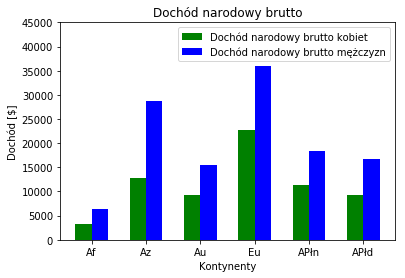

In [17]:
kontynenty = ['Af','Az','Au','Eu','APłn','APłd']
EGNIF = [3341.549020,12752.673913,9351.875000,22780.775000,11325.842105,9212.461538]
EGNIM = [6311.784314,28665.021739,15571.250000,35933.225000,18314.736842,16669.923077]

index = np.arange(6)
width = 0.3

plt.bar(index,EGNIF,width,color='green',label='Dochód narodowy brutto kobiet')
plt.bar(index+width,EGNIM,width,color='blue',label='Dochód narodowy brutto mężczyzn')
plt.title("Dochód narodowy brutto")

plt.ylabel("Dochód [$]")
plt.xlabel('Kontynenty')
plt.xticks(index+width/2, kontynenty)
plt.ylim(0,45000)

plt.legend(loc='best')
plt.show

## 4. CZY DOCHÓD NA OSOBĘ ZALEŻY OD LICZBY LAT NAUKI WŚRÓD MĘŻCZYZN?

### TEST:  Korelacja między liczbą lat nauki a dochodem na osobę wśród mężczyzn

In [21]:
st.pearsonr(dane['Estimated Gross National Income per Capita (Male)'],dane['Mean Years of Education (Male)'])

(0.5423097676497715, 1.0842954336530326e-13)

## ODPOWIEDŹ: Istotność jest mniejsza od 0.001, wiec możemy swobodnie odrzucić hipotezę zerową, która mówi o niezależności dwóch zmiennych i stwierdzić, że zmienna dochód na osobę zależy od liczby lat nauki wśród mężczyzn.

### Tabela i wykres ilustrujące:

Text(0.5, 0, 'dochód narodowy brutto mężczyzn')

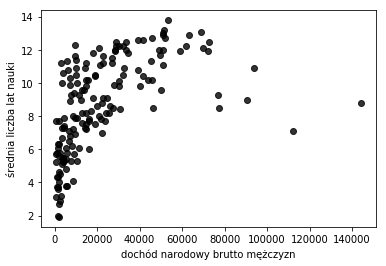

In [16]:
plt.scatter(dane['Estimated Gross National Income per Capita (Male)'], dane['Mean Years of Education (Male)'], alpha = 0.8, c = 'black')
plt.ylabel("średnia liczba lat nauki")
plt.xlabel('dochód narodowy brutto mężczyzn')

## 4. CZY DOCHÓD NA OSOBĘ ZALEŻY OD LICZBY LAT NAUKI WŚRÓD KOBIET?

In [22]:
st.pearsonr(dane['Estimated Gross National Income per Capita (Female)'],dane['Mean Years of Education (Female)'])

(0.640122833034476, 6.129568967605379e-20)

## ODPOWIEDŹ: Istotność jest mniejsza od 0.001, wiec możemy swobodnie odrzucić hipotezę zerową, która mówi o niezależności dwóch zmiennych i stwierdzić, że zmienna dochód na osobę zależy od liczby lat nauki wśród kobiet.

### Tabela i wykres

Text(0.5, 0, 'dochód narodowy brutto kobiet')

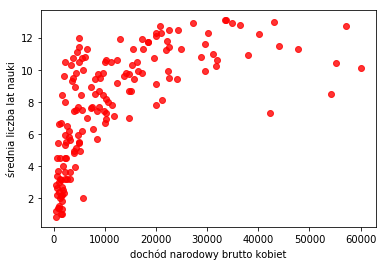

In [20]:
plt.scatter(dane['Estimated Gross National Income per Capita (Female)'], dane['Mean Years of Education (Female)'], alpha = 0.8, c = 'red')
plt.ylabel("średnia liczba lat nauki")
plt.xlabel('dochód narodowy brutto kobiet')